# Q1 ダンゴムシの性決定様式は何か

In [1]:
# ファイル名
RES_FILE = 'DE_result2.txt'  # 遺伝子発現量・比較結果
BST_FILE = 'DEGs_BLAST.txt' # 詳細情報リスト（BLAST結果）
GO_FILE  = 'DEGs_GO.txt'    # GO_IDリスト

In [2]:
# パッケージやツールをインポート
import pandas as pd
%matplotlib inline

# 読み込み
RES = pd.read_csv(RES_FILE, sep='\t', header=0,  index_col=0)
BST = pd.read_csv(BST_FILE, sep='\t', header=0,  index_col=0)
BST = BST.drop_duplicates()
GO  = pd.read_csv(GO_FILE, sep='\t', header=-1, index_col=0, names=['GO'])

遺伝子総数: 48797
発現変動遺伝子数: 4272
サンプルA高発現: 2072
サンプルB高発現: 2200


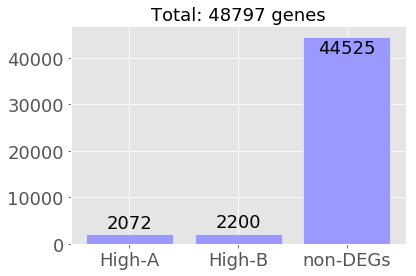

In [3]:
# 比較した遺伝子数
print('遺伝子総数:', len(RES))  

# 発現量に差があった遺伝子数
sub = RES[RES['FDR']<0.05]
print('発現変動遺伝子数:', len(sub))

# サンプルAで多く発現していた遺伝子数
subA = sub[sub['logFC']>0]
subB = sub[sub['logFC']<0]
print('サンプルA高発現:', len(subA))
print('サンプルB高発現:', len(subB))

# 棒グラフ
def bar_plot(df, log_scale=False):
    from matplotlib import pyplot as plt
    plt.style.use('ggplot')
    
    non = len(df) - len(df[df['FDR']<0.05])
    upA = len(df[(df['FDR']<0.05) & (df['logFC']>0)])
    upB = len(df[(df['FDR']<0.05) & (df['logFC']<0)])
    
    G = plt.bar(
        x      = ['High-A', 'High-B', 'non-DEGs'],
        height = [upA, upB, non], 
        align  = "center",
        log    = log_scale,
        facecolor='#9999ff',
        edgecolor='white',
    )
    
    # フォントサイズ
    plt.tick_params(labelsize=18)
    
    # カウント追加
    plt.text(0, upA*1.2, '%d'%upA, ha='center', va='bottom', size=18)
    plt.text(1, upB*1.2, '%d'%upB, ha='center', va='bottom', size=18)
    plt.text(2, non*0.9, '%d'%non, ha='center', va='bottom', size=18)
    # タイトル部分に遺伝子総数
    plt.title('Total: %d genes'%len(df), size=18)

bar_plot(RES)

# Wolbachiaの遺伝子を探す

## ①ワード検索: Bacteria

In [16]:
# 検索ワード
KEYWORD = 'Bacteria'

# サンプルA高発現遺伝子のBLAST情報
subA_BST = pd.merge(subA, BST, left_index=True, right_index=True, how='inner')
res = subA_BST[ subA_BST['sprot_Top_BLASTX_hit'].str.contains(KEYWORD) ]

print('メス高発現遺伝子数:', len(res)) #カウント

res #表示

メス高発現遺伝子数: 278


,female_1,female_2,male_1,male_2,sampleA,sampleB,logFC,logCPM,PValue,FDR,Wolbachia_wVulC,A_vulgare_f_element,A_vulgare_mitochondrion,sex_related_genes,sprot_BLASTX,sprot_Top_BLASTX_hit
TRINITY_DN103827_c0_g1,17,16,0,0,female,male,6.949162,0.618646,9.687615e-06,2.624335e-04,.,.,.,.,SYV_NITOC; Valine--tRNA ligase {ECO:0000255|HA...,"SYV_NITOC^SYV_NITOC^Q:3-398,H:790-920^36.364%I..."
TRINITY_DN10439_c0_g1,12,8,0,0,female,male,6.217877,0.071968,2.321531e-03,3.098811e-02,.,.,.,.,NADK_COXBU; NAD kinase {ECO:0000255|HAMAP-Rule...,"NADK_COXBU^NADK_COXBU^Q:717-1,H:10-245^57.322%..."
TRINITY_DN108109_c0_g1,11,12,0,0,female,male,6.440483,0.229015,4.167236e-04,7.281445e-03,.,.,.,.,DUSA_VIBCH; tRNA-dihydrouridine(20/20a) syntha...,"DUSA_VIBCH^DUSA_VIBCH^Q:1-363,H:123-244^63.934..."
TRINITY_DN11337_c0_g2,6,18,0,0,female,male,6.547726,0.301493,8.067527e-04,1.282056e-02,.,.,.,.,DAPF_SACD2; Diaminopimelate epimerase {ECO:000...,"DAPF_SACD2^DAPF_SACD2^Q:24-191,H:220-275^57.14..."
TRINITY_DN11448_c0_g1,6,27,0,0,female,male,7.019422,0.665425,1.371459e-04,2.799272e-03,.,.,.,.,TAPB_AERHY; Type IV pilus assembly protein TapB,"TAPB_AERHY^TAPB_AERHY^Q:484-293,H:502-565^50%I..."
TRINITY_DN1170_c0_g1,15,9,0,0,female,male,6.473194,0.255928,3.908084e-04,6.907972e-03,.,.,.,.,RFAQ_ECOLI; Lipopolysaccharide core heptosyltr...,"RFAQ_ECOLI^RFAQ_ECOLI^Q:467-204,H:199-287^32.5..."
TRINITY_DN120612_c0_g1,25,17,0,0,female,male,7.279322,0.886370,6.968104e-07,2.336624e-05,.,.,.,.,CLPB_VIBCH; Chaperone protein ClpB,"CLPB_VIBCH^CLPB_VIBCH^Q:3-440,H:705-850^60.959..."
TRINITY_DN120612_c0_g1,25,17,0,0,female,male,7.279322,0.886370,6.968104e-07,2.336624e-05,.,.,.,.,CLPB_VIBCH; Chaperone protein ClpB,"CLPB_VIBCH^CLPB_VIBCH^Q:3-440,H:705-850^60.959..."
TRINITY_DN132605_c0_g1,34,32,0,0,female,male,7.943644,1.454003,7.821966e-10,3.991334e-08,.,.,.,.,YEIE_ECOLI; Uncharacterized HTH-type transcrip...,"YEIE_ECOLI^YEIE_ECOLI^Q:894-79,H:19-287^36.364..."
TRINITY_DN17274_c0_g1,12,8,0,0,female,male,6.217877,0.071968,2.322554e-03,3.098811e-02,.,.,.,.,COAX_BDEBA; Type III pantothenate kinase {ECO:...,"COAX_BDEBA^COAX_BDEBA^Q:2-304,H:155-255^53.465..."


In [17]:
# サンプルB高発現遺伝子のBLAST情報
subB_BST = pd.merge(subB, BST, left_index=True, right_index=True, how='inner')
res = subB_BST[ subB_BST['sprot_Top_BLASTX_hit'].str.contains(KEYWORD) ]

print('オス高発現遺伝子数:', len(res)) #カウント

res #表示

オス高発現遺伝子数: 31


,female_1,female_2,male_1,male_2,sampleA,sampleB,logFC,logCPM,PValue,FDR,Wolbachia_wVulC,A_vulgare_f_element,A_vulgare_mitochondrion,sex_related_genes,sprot_BLASTX,sprot_Top_BLASTX_hit
TRINITY_DN131851_c0_g1,31,29,53,89,female,male,-1.457115,3.077078,2.759908e-03,3.559002e-02,.,.,.,.,YIFB_SALTY; Uncharacterized protein YifB,"YIFB_SALTY^YIFB_SALTY^Q:354-536,H:1-61^70.492%..."
TRINITY_DN139126_c0_g1,0,0,12,9,female,male,-6.537881,0.240067,3.442541e-04,6.190723e-03,.,.,.,.,SSB_BACCR; Single-stranded DNA-binding protein...,"SSB_BACCR^SSB_BACCR^Q:414-701,H:5-105^47.525%I..."
TRINITY_DN39715_c0_g1,16,15,30,53,female,male,-1.631227,2.293828,2.556248e-03,3.349614e-02,.,.,.,.,HFLD_SACD2; High frequency lysogenization prot...,"HFLD_SACD2^HFLD_SACD2^Q:287-30,H:111-196^45.34..."
TRINITY_DN41264_c0_g1,15,15,36,62,female,male,-1.915143,2.459127,3.479282e-04,6.242958e-03,.,.,.,.,PILB_PSEAE; Type 4 fimbrial assembly protein PilB,"PILB_PSEAE^PILB_PSEAE^Q:951-187,H:310-566^56.0..."
TRINITY_DN42112_c0_g1,0,0,16,29,female,male,-7.609729,1.118186,9.183937e-08,3.534182e-06,.,.,.,.,G3P_CLOPA; Glyceraldehyde-3-phosphate dehydrog...,"G3P_CLOPA^G3P_CLOPA^Q:79-1056,H:1-329^57.879%I..."
TRINITY_DN42112_c0_g1,0,0,16,29,female,male,-7.609729,1.118186,9.183937e-08,3.534182e-06,.,.,.,.,G3P_CLOPA; Glyceraldehyde-3-phosphate dehydrog...,"G3P_CLOPA^G3P_CLOPA^Q:79-1056,H:1-329^57.879%I..."
TRINITY_DN44888_c0_g1,0,0,14,13,female,male,-6.892266,0.516530,2.143386e-05,5.383903e-04,.,.,.,.,DBH_THET8; DNA-binding protein HU,"DBH_THET8^DBH_THET8^Q:61-303,H:13-93^38.272%ID..."
TRINITY_DN45076_c0_g1,0,0,14,5,female,male,-6.410962,0.142133,1.716499e-03,2.422501e-02,.,.,.,.,DNAK_MYCHJ; Chaperone protein DnaK {ECO:000025...,"DNAK_MYCHJ^DNAK_MYCHJ^Q:25-1002,H:263-591^53.7..."
TRINITY_DN45920_c0_g1,0,0,5,19,female,male,-6.695037,0.365286,4.052436e-04,7.120191e-03,.,.,.,.,LACB_CLOAB; Galactose-6-phosphate isomerase su...,"LACB_CLOAB^LACB_CLOAB^Q:244-681,H:1-149^56.376..."
TRINITY_DN49235_c0_g1,0,0,9,18,female,male,-6.876063,0.505007,3.927051e-05,9.223509e-04,.,.,.,.,DNAK_ERYRH; Chaperone protein DnaK,"DNAK_ERYRH^DNAK_ERYRH^Q:1-555,H:82-267^76.882%..."


## ②ワード検索: Wolbachia

In [18]:
# 検索ワード
KEYWORD = 'Wolbachia'

# サンプルA高発現遺伝子のBLAST情報
subA_BST = pd.merge(subA, BST, left_index=True, right_index=True, how='inner')
res = subA_BST[ subA_BST['sprot_Top_BLASTX_hit'].str.contains(KEYWORD) ]

print('メス高発現遺伝子数:', len(res)) #カウント

res #表示

メス高発現遺伝子数: 0


,female_1,female_2,male_1,male_2,sampleA,sampleB,logFC,logCPM,PValue,FDR,Wolbachia_wVulC,A_vulgare_f_element,A_vulgare_mitochondrion,sex_related_genes,sprot_BLASTX,sprot_Top_BLASTX_hit


In [19]:
# サンプルB高発現遺伝子のBLAST情報
subB_BST = pd.merge(subB, BST, left_index=True, right_index=True, how='inner')
res = subB_BST[ subB_BST['sprot_Top_BLASTX_hit'].str.contains(KEYWORD) ]

print('オス高発現遺伝子数:', len(res)) #カウント

res #表示

オス高発現遺伝子数: 0


,female_1,female_2,male_1,male_2,sampleA,sampleB,logFC,logCPM,PValue,FDR,Wolbachia_wVulC,A_vulgare_f_element,A_vulgare_mitochondrion,sex_related_genes,sprot_BLASTX,sprot_Top_BLASTX_hit


## ③Wolbachiaとf elementの遺伝子へのBLAST結果

In [40]:
total_BST = pd.merge(RES, BST, left_index=True, right_index=True, how='left')
total_BST = total_BST.drop_duplicates()
W = total_BST[ (total_BST['Wolbachia_wVulC']!='.') |  (total_BST['A_vulgare_f_element']!='.') ]
#W = W[W['FDR']>=0.05] 

print('検索された遺伝子数:', len(W)) 
print('非変動遺伝子数:', len(W[W['FDR']>=0.05])) 
print('メス高発現遺伝子数:', len(W[ (W['FDR']<0.05) & (W['logFC']>0) ])) 
print('オス高発現遺伝子数:', len(W[ (W['FDR']<0.05) & (W['logFC']<0) ])) 

W

検索された遺伝子数: 30
非変動遺伝子数: 23
メス高発現遺伝子数: 0
オス高発現遺伝子数: 7


,female_1,female_2,male_1,male_2,sampleA,sampleB,logFC,logCPM,PValue,FDR,Wolbachia_wVulC,A_vulgare_f_element,A_vulgare_mitochondrion,sex_related_genes,sprot_BLASTX,sprot_Top_BLASTX_hit
TRINITY_DN20182_c0_g1,0,2,10,6,female,male,-3.046763,0.074567,0.039520,0.242138,ankyrin repeat domain protein,Phosphocholine transferase AnkX,.,.,.,NaN
TRINITY_DN22629_c0_g1,1,2,7,8,female,male,-2.434990,0.059529,0.073058,0.345516,"cytochrome c-type biogenesis protein CcmF, put...",Cytochrome c-type biogenesis protein CcmF,.,.,.,NaN
TRINITY_DN23590_c0_g1,5,1,6,9,female,male,-1.542121,0.192159,0.166305,0.518226,hypothetical protein,DEAD/DEAH box helicase,.,.,.,NaN
TRINITY_DN27122_c0_g1,8,1,3,4,female,male,0.064842,-0.117723,1.000000,1.000000,hypothetical protein,hypothetical protein,.,.,.,NaN
TRINITY_DN30343_c0_g1,5,2,6,24,female,male,-2.283387,0.839026,0.015037,0.127657,hypothetical protein,hypothetical protein,.,.,.,NaN
TRINITY_DN42675_c0_g1,4,0,6,11,female,male,-2.282136,0.199404,0.053945,0.290139,hypothetical protein,hypothetical protein,.,.,.,NaN
TRINITY_DN49330_c0_g1,77,67,142,148,female,male,-1.241809,4.154307,0.002924,0.037174,.,Phosphocholine transferase AnkX,.,.,.,NaN
TRINITY_DN49672_c0_g1,19,23,62,81,female,male,-1.975581,2.975785,0.000068,0.001511,hypothetical protein,hypothetical protein,.,.,.,NaN
TRINITY_DN49713_c0_g1,25,31,81,70,female,male,-1.649166,3.133091,0.000641,0.010536,putative oxidoreductase,Hydrogenase-4 component B,.,.,.,NaN
TRINITY_DN49825_c1_g1,20,21,42,85,female,male,-1.833728,2.828986,0.000628,0.010365,putative membrane protein,hypothetical protein,.,.,.,NaN
